<a href="https://colab.research.google.com/github/akulkarni14/AAI-praticals/blob/main/PR1-bfsdfsA*.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

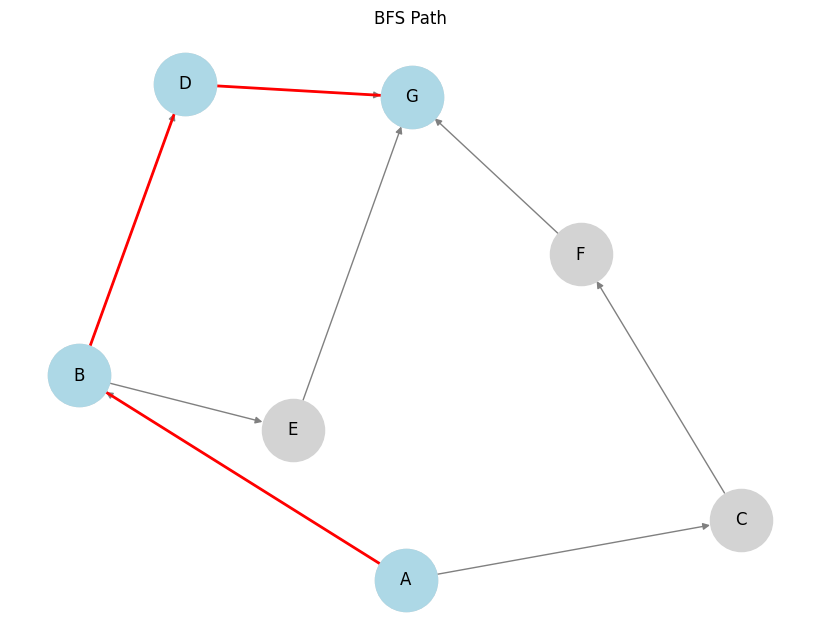

BFS Path: ['A', 'B', 'D', 'G']


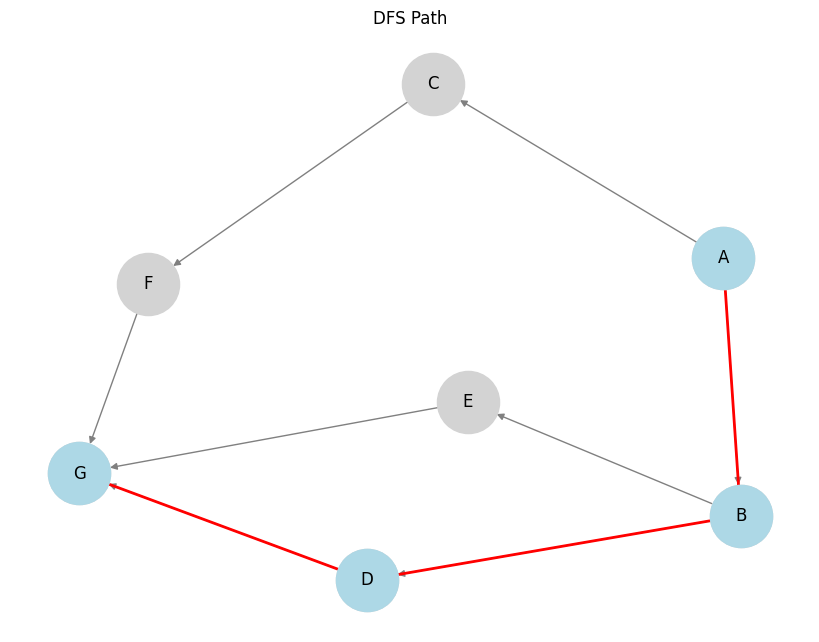

DFS Path: ['A', 'B', 'D', 'G']


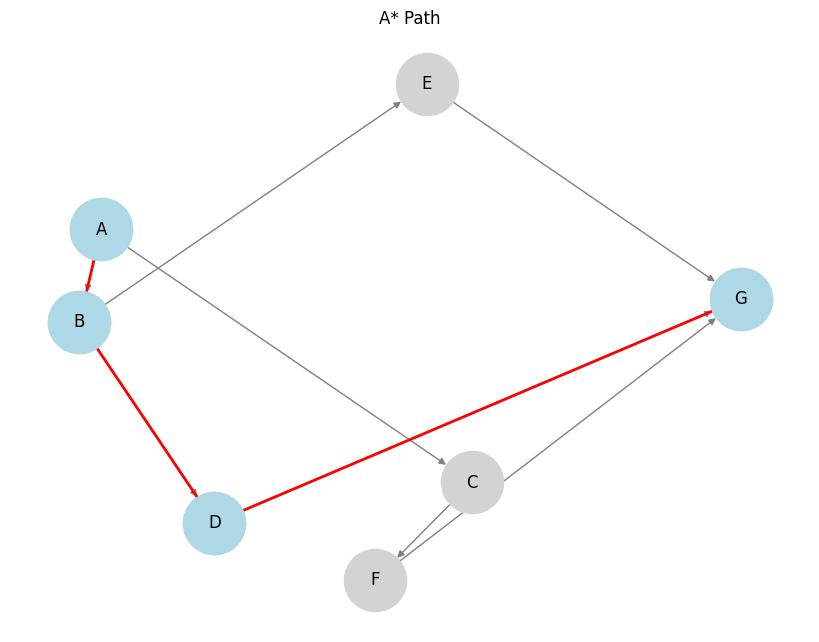

A* Path: ['A', 'B', 'D', 'G']


In [2]:

import networkx as nx
import matplotlib.pyplot as plt
from queue import PriorityQueue, Queue

class Node:
    def __init__(self, state, parent=None, action=None, cost=0, depth=0, heuristic=0):
        self.state = state
        self.parent = parent
        self.action = action
        self.cost = cost
        self.depth = depth
        self.heuristic = heuristic

    def __lt__(self, other):
        return (self.cost + self.heuristic) < (other.cost + other.heuristic)

def get_successors(state):
    successors = {
        'A': [('B', 1), ('C', 4)],
        'B': [('D', 2), ('E', 5)],
        'C': [('F', 3)],
        'D': [('G', 2)],
        'E': [('G', 1)],
        'F': [('G', 2)],
        'G': []
    }
    return successors.get(state, [])

def heuristic(state, goal):
    h_values = {'A': 6, 'B': 4, 'C': 3, 'D': 2, 'E': 2, 'F': 1, 'G': 0}
    return h_values.get(state, float('inf'))

def reconstruct_path(node):
    path = []
    while node:
        path.append(node.state)
        node = node.parent
    return path[::-1]

def visualize_graph(path, title):
    G = nx.DiGraph()
    successors = {
        'A': ['B', 'C'],
        'B': ['D', 'E'],
        'C': ['F'],
        'D': ['G'],
        'E': ['G'],
        'F': ['G'],
        'G': []
    }
    for state, nodes in successors.items():
        for s in nodes:
            G.add_edge(state, s)

    pos = nx.spring_layout(G)
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='lightgray', edge_color='gray', node_size=2000, font_size=12)
    path_edges = list(zip(path, path[1:]))
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2)
    nx.draw_networkx_nodes(G, pos, nodelist=path, node_color='lightblue', node_size=2000)
    plt.title(title)
    plt.show()

def bfs(start, goal):
    frontier = Queue()
    frontier.put(Node(start))
    explored = set()

    while not frontier.empty():
        node = frontier.get()
        if node.state == goal:
            path = reconstruct_path(node)
            visualize_graph(path, "BFS Path")
            return path
        explored.add(node.state)
        for (child, cost) in get_successors(node.state):
            if child not in explored:
                frontier.put(Node(child, node))
    return None

def dfs(start, goal):
    frontier = [Node(start)]
    explored = set()

    while frontier:
        node = frontier.pop()
        if node.state == goal:
            path = reconstruct_path(node)
            visualize_graph(path, "DFS Path")
            return path
        explored.add(node.state)
        for (child, cost) in reversed(get_successors(node.state)):
            if child not in explored:
                frontier.append(Node(child, node))
    return None

def a_star(start, goal):
    frontier = PriorityQueue()
    frontier.put(Node(start, cost=0, heuristic=heuristic(start, goal)))
    explored = {}

    while not frontier.empty():
        node = frontier.get()
        if node.state == goal:
            path = reconstruct_path(node)
            visualize_graph(path, "A* Path")
            return path
        explored[node.state] = node.cost
        for (child, cost) in get_successors(node.state):
            new_cost = node.cost + cost
            if child not in explored or new_cost < explored[child]:
                frontier.put(Node(child, node, cost=new_cost, heuristic=heuristic(child, goal)))
                explored[child] = new_cost
    return None

# Main execution
start_state = 'A'
goal_state = 'G'

print("BFS Path:", bfs(start_state, goal_state))
print("DFS Path:", dfs(start_state, goal_state))
print("A* Path:", a_star(start_state, goal_state))


